In [1]:
from data_process import *
from model import *
import os
import torch.nn as nn
    
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

cpu


In [2]:
#训练函数
def train(epochs):
    model.train() #模型设置成训练模式
    for epoch in range(epochs): #训练epochs轮
        loss_sum = 0  #记录每轮loss
        for batch in train_iter:
            input_, aspect, label = batch
            optimizer.zero_grad() #每次迭代前设置grad为0

            #不同的模型输入不同，请同学们看model.py文件
            output = model(input_) # LSTM
            # output = model(input_, aspect) # AE / ATAE / AT

            loss = criterion(output, label) #计算loss
            loss.backward() #反向传播
            optimizer.step() #更新模型参数
            loss_sum += loss.item() #累积loss
        print('epoch: ', epoch, 'loss:', loss_sum / len(test_iter))

    test_acc = evaluate() #模型训练完后进行测试
    print('test_acc:', test_acc)


In [3]:
#测试函数
def evaluate():
    model.eval()
    total_acc, total_count = 0, 0
    loss_sum = 0

    with torch.no_grad(): #测试时不计算梯度
        for batch in test_iter:
            input_, aspect, label = batch

            predicted_label = model(input_) # LSTM
            # predicted_label = model(input_, aspect) #  AE / ATAE /AT

            loss = criterion(predicted_label, label) #计算loss
            total_acc += (predicted_label.argmax(1) == label).sum().item() #累计正确预测数
            total_count += label.size(0) #累积总数
            loss_sum += loss.item() #累积loss
        print('test_loss:', loss_sum / len(test_iter))

    return total_acc/total_count

In [4]:
import os
import torch.nn as nn
TORCH_SEED = 21 #随机数种子
os.environ["CUDA_VISIBLE_DEVICES"] = '0' #设置模型在几号GPU上跑
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  #设置device


In [5]:
# 设置随机数种子，保证结果一致
os.environ['PYTHONHASHSEED'] = str(TORCH_SEED)
torch.manual_seed(TORCH_SEED)
torch.cuda.manual_seed_all(TORCH_SEED)
np.random.seed(TORCH_SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## 创建数据集

In [6]:
#创建数据集
train_dataset = MyDataset('./data/acsa_train.json')
test_dataset = MyDataset('./data/acsa_test.json')
train_iter = DataLoader(train_dataset, batch_size=25, shuffle=True, collate_fn=batch_process)
test_iter = DataLoader(test_dataset, batch_size=25, shuffle=False, collate_fn=batch_process)


## 加载我们的Embedding矩阵 已经训练好的，可以自行训练

In [7]:
# 加载我们的Embedding矩阵 已经训练好的，可以自行训练
embedding = torch.tensor(np.load('./emb/my_embeddings.npz')['embeddings'], dtype=torch.float)


# 定义模型

In [8]:
#定义模型
# model = LSTM_Network(embedding).to(device)
# model = AELSTM_Network(embedding).to(device)
# model = ATAELSTM_Network(embedding).to(device)
model = ATLSTM_Network(embedding).to(device)
#共4个模型

In [9]:
#定义loss函数、优化器
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01, weight_decay=0.001)


# ATAE-LSTM 实现效果：

In [ ]:
time: 1710.005s
test_loss: 0.5950065492367258
test_acc: 0.8025556471558121

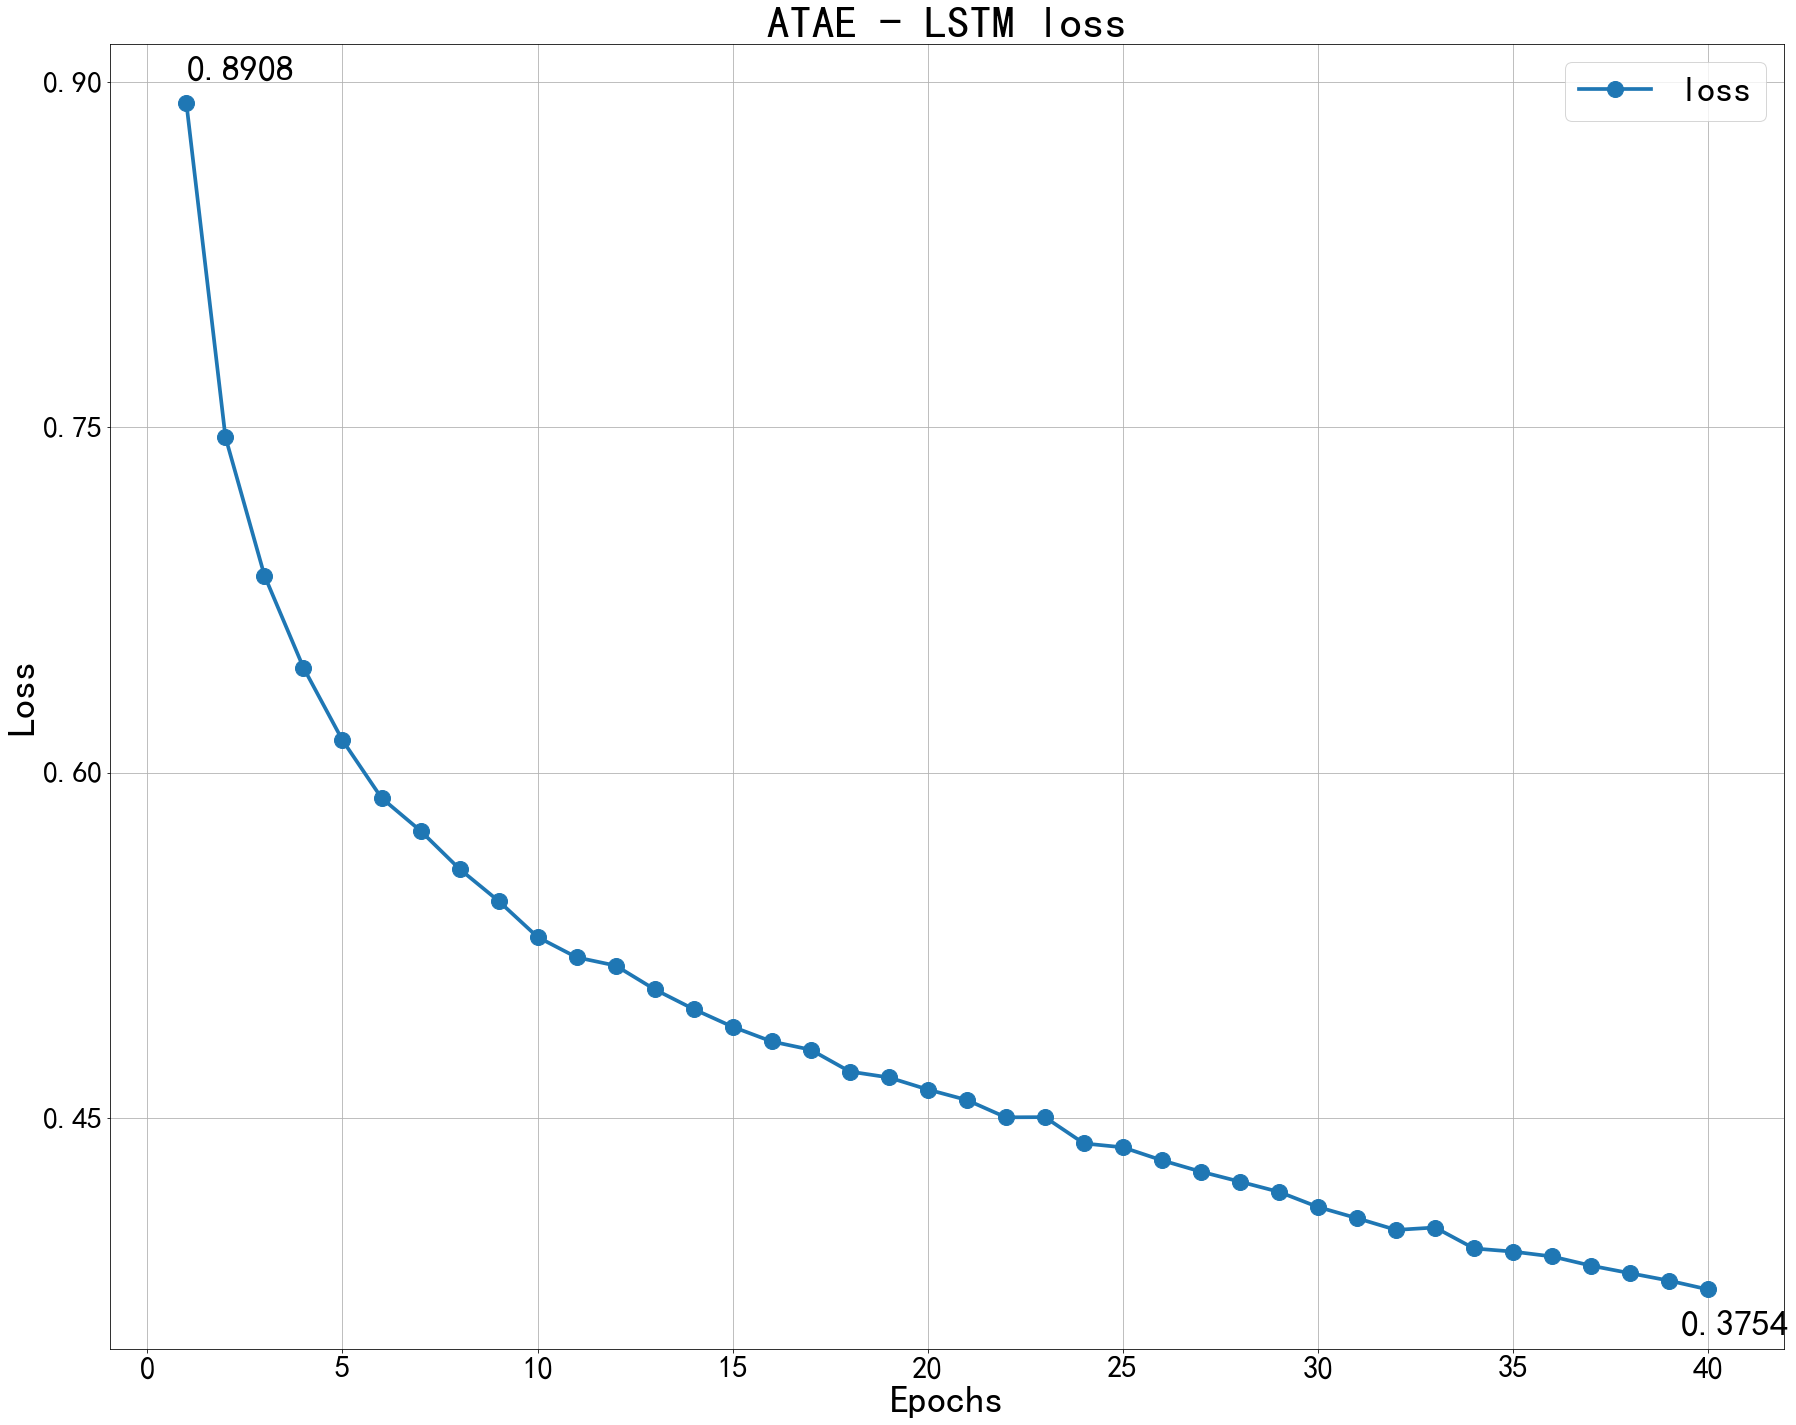

In [10]:
loss =  [0.8907992334608088, 0.745821307368457, 0.6856523224695481, 0.6456023819625059, 0.6140593417825546,
         0.5889978294066567, 0.5747145874933763, 0.5581247667896556, 0.5442235635563651, 0.5285490454836963, 
         0.5197350457709103, 0.5161454060817148, 0.5058127699051311, 0.4972169944309296, 0.48953256760051544, 
         0.4831594550673337, 0.4795763220060318, 0.4700950068586013, 0.4675421995275161, 0.4622881280228416, 
         0.4577310321165279, 0.45021006002783137,0.4502862024116006, 0.4388650319474266, 0.43716885667433714, 
         0.43152047414830663, 0.42658864097161725, 0.4222437466848343, 0.417804466530601, 0.4112314422500325,
         0.4063682642212526, 0.40127849260116005, 0.4023279426569607, 0.3932137074955007, 0.3918531704395213, 
         0.3897372916101772, 0.3857297049486701, 0.38245446318611104, 0.37922437975113404, 0.3753862250297465]
import matplotlib.pyplot as plt
from pylab import *
from decimal import Decimal 
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(30,24))
plt.plot(epochs, loss, marker = 'o', label = 'loss', markersize = 16,linewidth = 3.7)

x_major_locator = MultipleLocator(5)
y_major_locator = MultipleLocator(0.15)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.annotate(Decimal(loss[39]).quantize(Decimal('0.0000')), xy = (40,loss[39]), fontsize = 36, xytext=(39.3,loss[39] - 0.02))
plt.annotate(Decimal(loss[0]).quantize(Decimal('0.0000')), xy = (1,loss[0]), fontsize = 36, xytext=(1,loss[0] + 0.01))
plt.tick_params(axis = 'both', which = 'major', labelsize = 30)
plt.tick_params(axis = 'x', which = 'major', labelsize =31)

plt.title('ATAE - LSTM loss', fontsize = 45)
plt.xlabel('Epochs',fontsize = 38)
plt.ylabel('Loss', fontsize = 38)
# minorticks_on()
plt.grid()
plt.legend(loc = 1, prop = {'size' : 36})
plt.show()

# AT-LSTM 模型效果

In [ ]:
test_loss: 0.6104765881081017
test_acc: 0.7893652102225887
time: 2199.394s


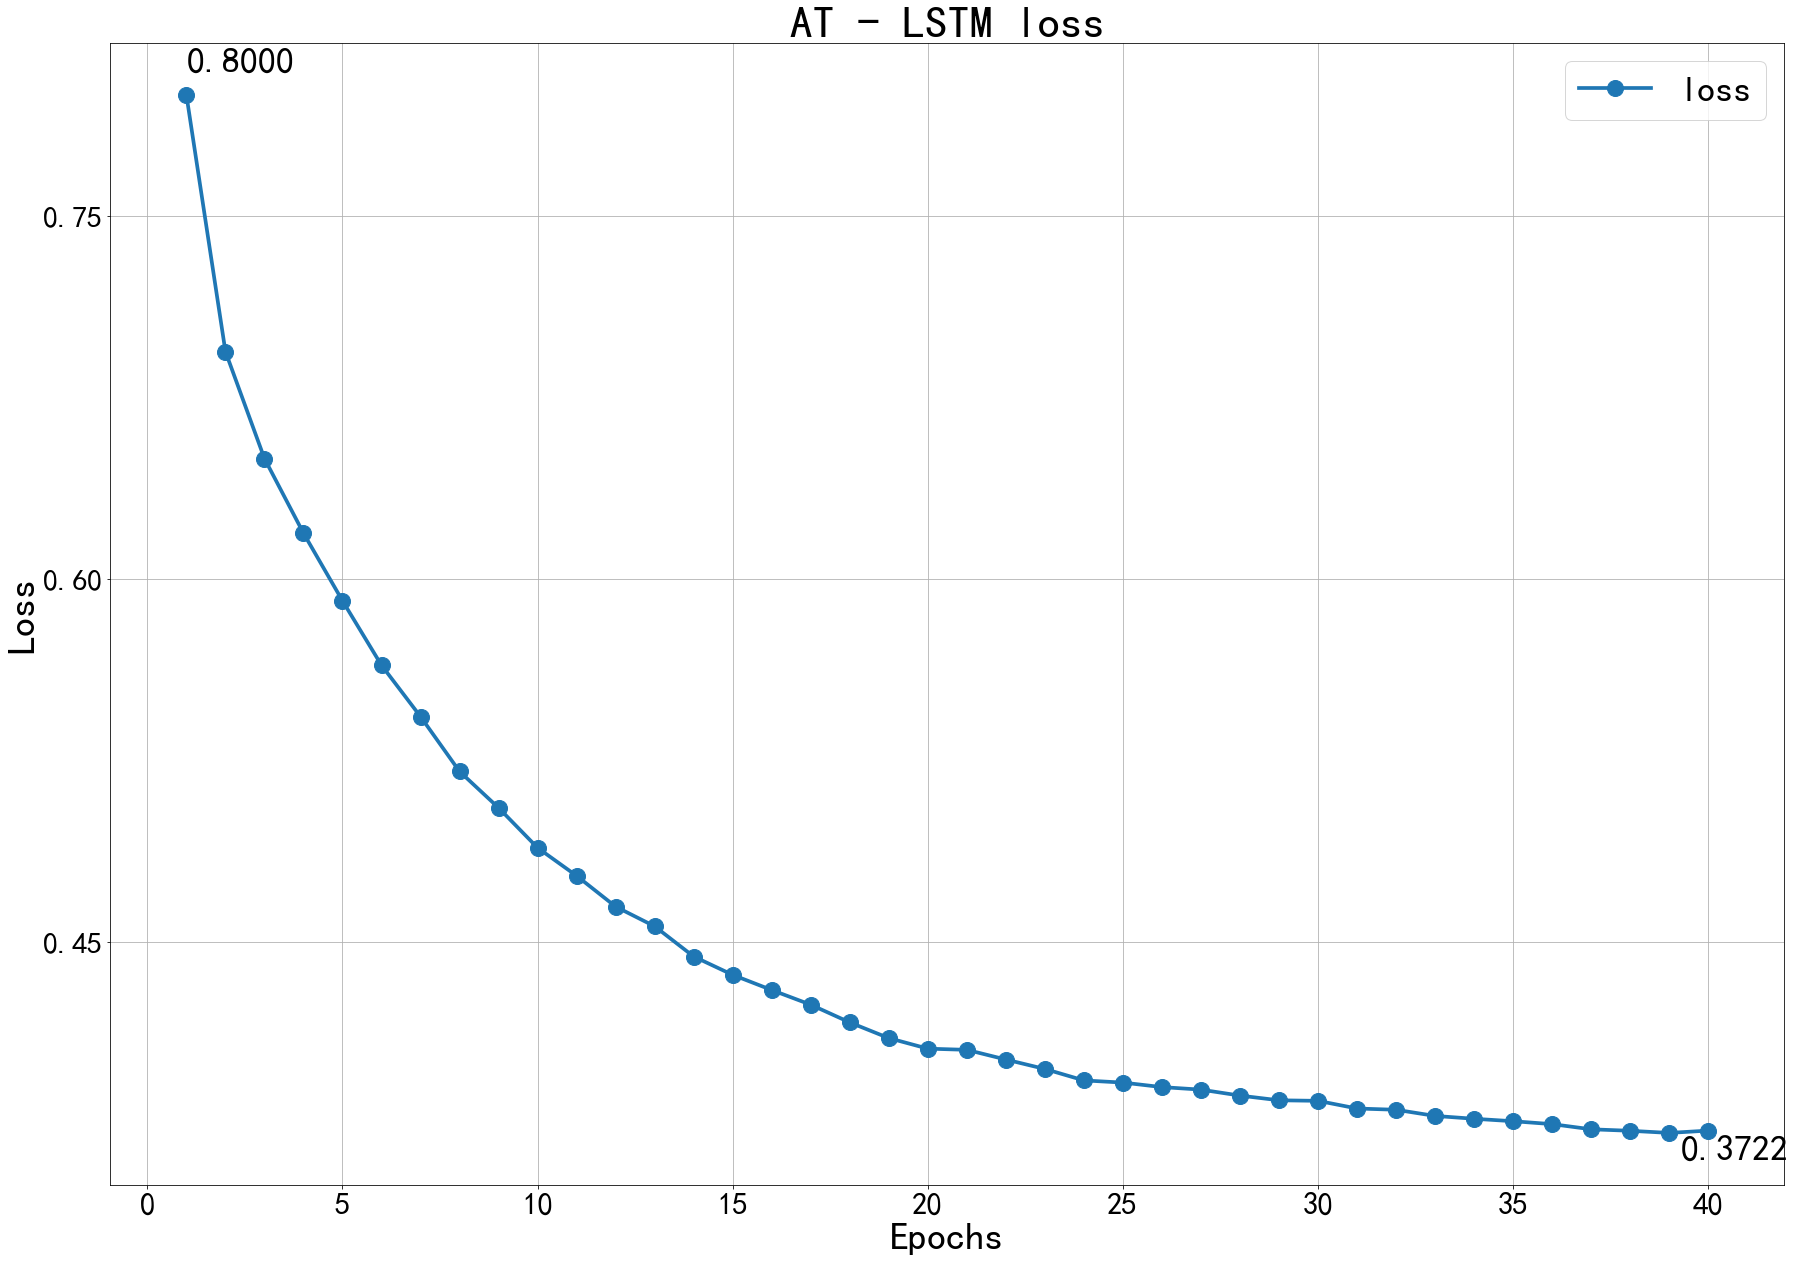

In [11]:
loss =  [0.799975635693035, 0.6940574008513262, 0.6498545416217437, 0.6190354854346597, 0.5910880395116653, 
         0.564455818046223, 0.5432470102998662, 0.5205944325515931, 0.505571321848242, 0.4890501596392157, 
         0.4774867414153196, 0.46475742892785504, 0.45662446280214236, 0.44415243806685994, 0.43657386063891934, 
         0.4303083690730008, 0.4242443907707133, 0.41693284422318566, 0.4104514040730216, 0.40609536770193333, 
         0.4056081711289717, 0.4016021768995785, 0.3977025903482488, 0.3929735007770559, 0.39208314364606683, 
         0.39021640346649494, 0.3891714973883195, 0.3867064199664376, 0.38476845606125615, 0.38453850691968744, 
         0.38137352928758306, 0.38085622232865524, 0.37830634335464336, 0.37713414016254443, 0.37612039105777434,
         0.3749175921162182, 0.37278665116126525, 0.3721710606054826, 0.3712913924678762, 0.3722487291231512]

import matplotlib.pyplot as plt
from pylab import *
from decimal import Decimal 
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(30,21))
plt.plot(epochs, loss, marker = 'o', label = 'loss', markersize = 16,linewidth = 3.7)

x_major_locator = MultipleLocator(5)
y_major_locator = MultipleLocator(0.15)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.annotate(Decimal(loss[39]).quantize(Decimal('0.0000')), xy = (40,loss[39]), fontsize = 36, xytext=(39.3,loss[39] - 0.012))
plt.annotate(Decimal(loss[0]).quantize(Decimal('0.0000')), xy = (1,loss[0]), fontsize = 36, xytext=(1,loss[0] + 0.01))
plt.tick_params(axis = 'both', which = 'major', labelsize = 30)
plt.tick_params(axis = 'x', which = 'major', labelsize =31)

plt.title('AT - LSTM loss', fontsize = 45)
plt.xlabel('Epochs',fontsize = 38)
plt.ylabel('Loss', fontsize = 38)
# minorticks_on()
plt.grid()
plt.legend(loc = 1, prop = {'size' : 36})
plt.show()

# AE-LSTM 模型效果：

In [ ]:
time: 1125.598s
test_loss: 0.8357382054839816
test_acc: 0.6240725474031328


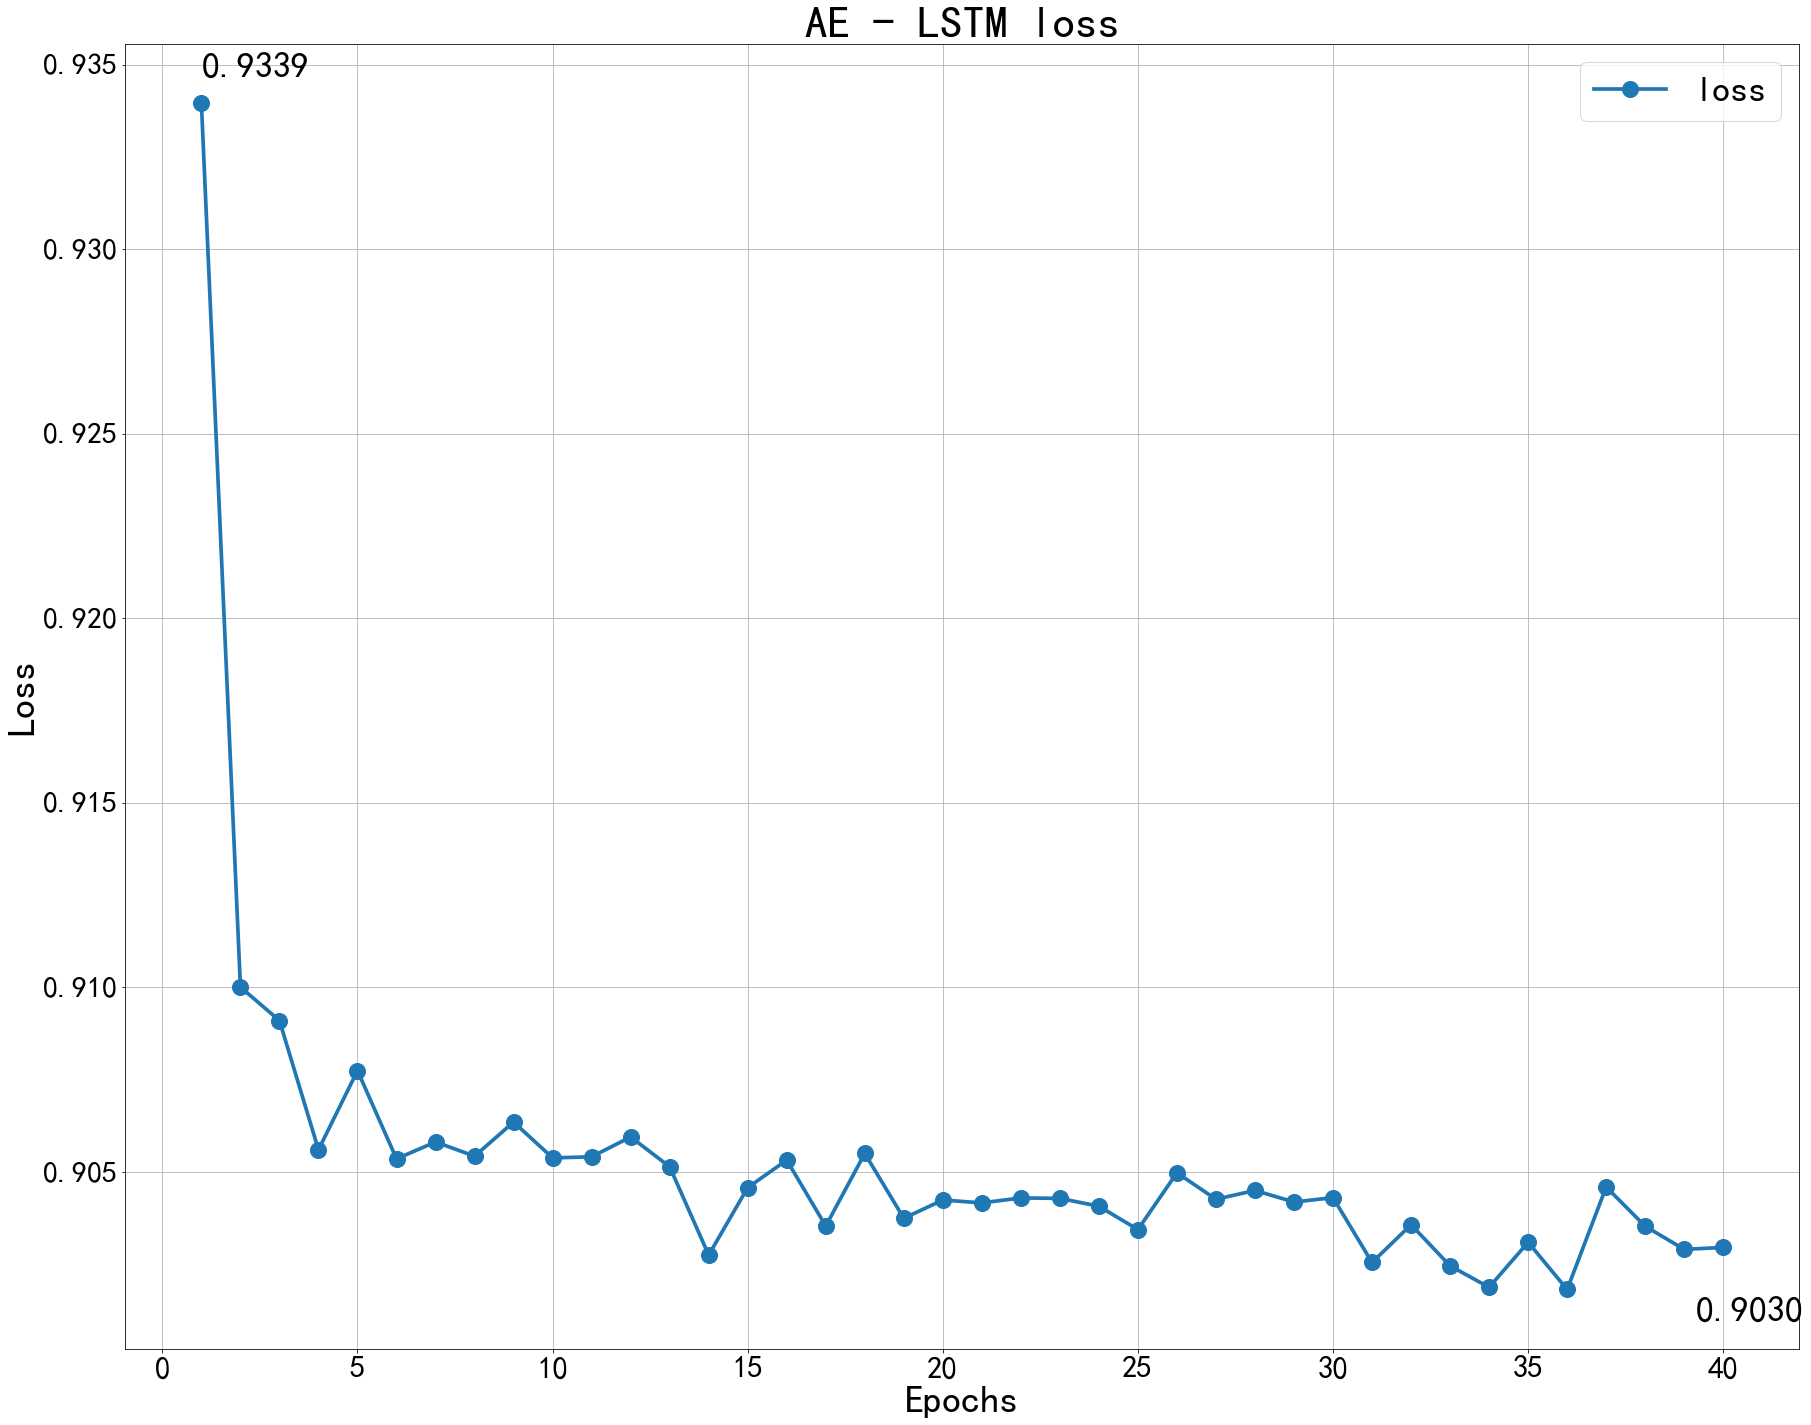

In [12]:
loss =  [0.933945941733804, 0.9100040908165794, 0.9090972252708068, 0.905597516559662, 0.9077402812274382, 
         0.9053502952988772, 0.9058089437969228, 0.9054230891447016, 0.9063481838307916, 0.9053763109732439,
         0.905406561127321, 0.9059440171654849, 0.9051364959879993, 0.9027453252975953, 0.9045723306941477, 
         0.9053164927717199, 0.9035309562708604, 0.9054967875786644, 0.9037404299419831, 0.9042361901405661,
         0.9041571406757131, 0.904292195557273, 0.9042798650455984, 0.9040666579562713, 0.9034354106627683, 
         0.9049735136210599, 0.9042556620536641, 0.904495009763993, 0.9041805895254573, 0.9042998067835436,
         0.9025426969171207, 0.9035663394366994,0.9024511327080548, 0.9018709630889689, 0.903090742820087,
         0.9018110693457292, 0.9045877874216294, 0.903524319118357, 0.9028987925957869, 0.9029501115574556]

import matplotlib.pyplot as plt
from pylab import *
from decimal import Decimal 
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(30,24))
plt.plot(epochs, loss, marker = 'o', label = 'loss', markersize = 16,linewidth = 3.7)

x_major_locator = MultipleLocator(5)
y_major_locator = MultipleLocator(0.005)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.annotate(Decimal(loss[39]).quantize(Decimal('0.0000')), xy = (40,loss[39]), fontsize = 36, xytext=(39.3,loss[39] - 0.002))
plt.annotate(Decimal(loss[0]).quantize(Decimal('0.0000')), xy = (1,loss[0]), fontsize = 36, xytext=(1,loss[0] + 0.0007))
plt.tick_params(axis = 'both', which = 'major', labelsize = 30)
plt.tick_params(axis = 'x', which = 'major', labelsize =31)

plt.title('AE - LSTM loss', fontsize = 45)
plt.xlabel('Epochs',fontsize = 38)
plt.ylabel('Loss', fontsize = 38)
# minorticks_on()
plt.grid()
plt.legend(loc = 1, prop = {'size' : 36})
plt.show()

# LSTM 模型效果：

In [ ]:
test_loss: 0.8974083716772041
test_acc: 0.622835943940643
time: 1013.854s

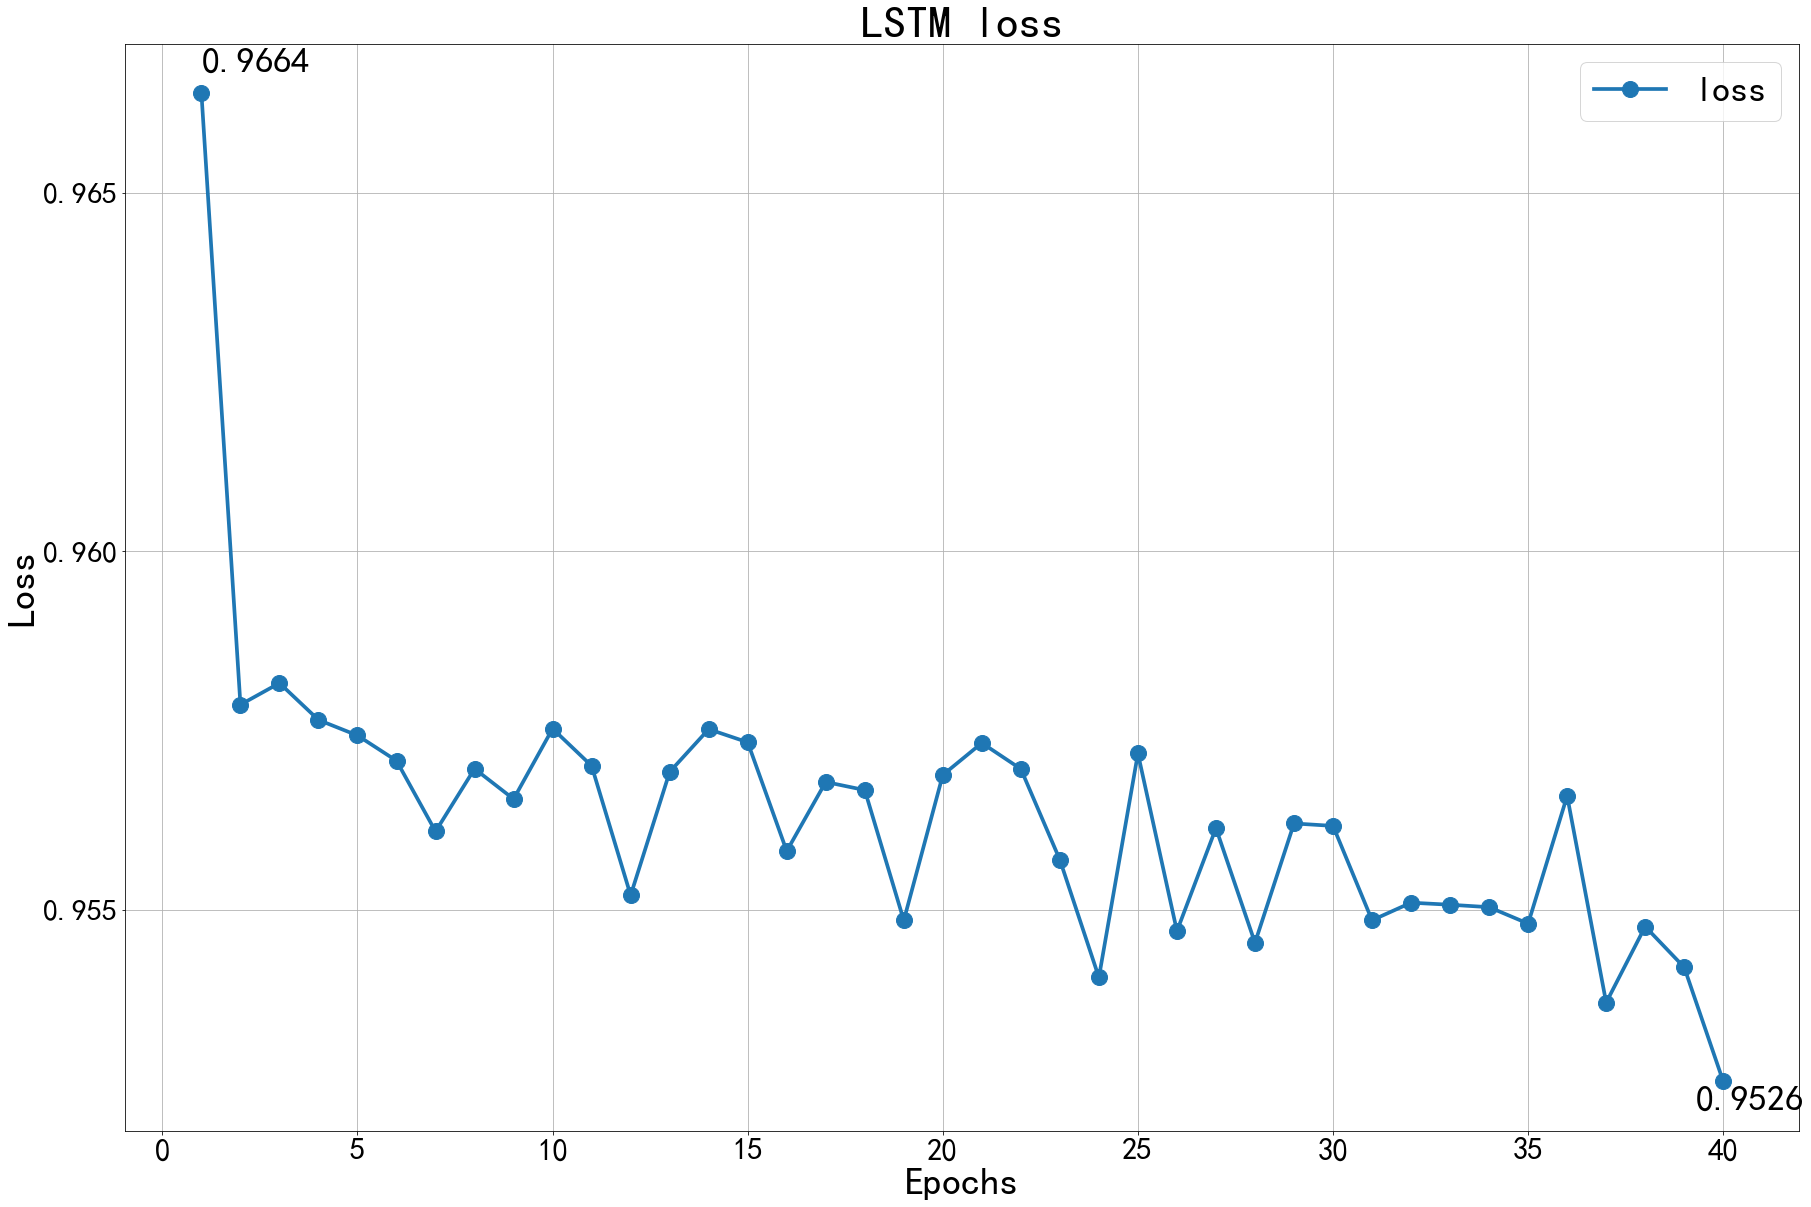

In [13]:
loss =  [0.9663914706617753, 0.9578638730202129, 0.9581653345077433, 0.9576517216024552, 0.9574350067638459, 
         0.9570826100793114, 0.9560972751780628, 0.9569709928915462, 0.9565487376508865, 0.9575299219014173,
         0.9570112999747781, 0.955206942430792, 0.956927247544661, 0.9575228509418467, 0.9573397492979937, 
         0.9558232659324605, 0.9567866739742259, 0.9566735899384646, 0.9548568075353449, 0.9568845776313128,
         0.9573304767914634, 0.9569676387756266, 0.9557011838265281, 0.9540623040760264, 0.9571839370192053, 
         0.9547083543583671, 0.956143220796942, 0.9545447998505863, 0.9562084942577994, 0.9561744310001639, 
         0.9548589510713669, 0.9551038356388316, 0.9550752993573479, 0.9550414630436005, 0.9548120406222216, 
         0.9565924498486646, 0.9537111645076364, 0.9547711435486289, 0.9542028103920228, 0.9526126560042886]

import matplotlib.pyplot as plt
from pylab import *
from decimal import Decimal 
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(30,20))
plt.plot(epochs, loss, marker = 'o', label = 'loss', markersize = 16,linewidth = 3.7)

x_major_locator = MultipleLocator(5)
y_major_locator = MultipleLocator(0.005)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.annotate(Decimal(loss[39]).quantize(Decimal('0.0000')), xy = (40,loss[39]), fontsize = 36, xytext=(39.3,loss[39] - 0.0004))
plt.annotate(Decimal(loss[0]).quantize(Decimal('0.0000')), xy = (1,loss[0]), fontsize = 36, xytext=(1,loss[0] + 0.0003))
plt.tick_params(axis = 'both', which = 'major', labelsize = 30)
plt.tick_params(axis = 'x', which = 'major', labelsize =31)

plt.title('LSTM loss', fontsize = 45)
plt.xlabel('Epochs',fontsize = 38)
plt.ylabel('Loss', fontsize = 38)
# minorticks_on()
plt.grid()
plt.legend(loc = 1, prop = {'size' : 36})
plt.show()